In [2]:
#importing the libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing the datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df_train.shape

(1460, 81)

In [10]:
df_train.isnull().sum()[df_train.isnull().sum() !=0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [11]:
df_test.isnull().sum()[df_test.isnull().sum() !=0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

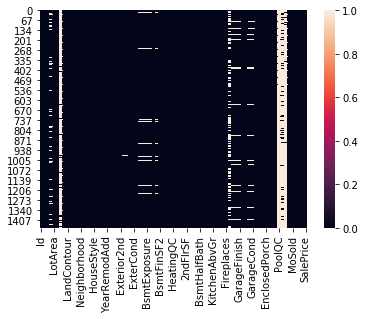

In [6]:
sns.heatmap(df_train.isnull());

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
#fill missing values
df_train['LotFrontage'] = df_train.LotFrontage.fillna(df_train['LotFrontage'].mean())

In [9]:
df_test['LotFrontage'] = df_test.LotFrontage.fillna(df_test['LotFrontage'].mean())

In [30]:
df_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [11]:
df_train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [12]:
df_test['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [13]:
df_train.drop(['Alley'],axis=1,inplace=True)
df_test.drop(['Alley'],axis=1,inplace=True)
df_train.drop(['PoolQC'],axis=1,inplace=True)
df_test.drop(['PoolQC'],axis=1,inplace=True)
df_train.drop(['MiscFeature'],axis=1,inplace=True)
df_test.drop(['MiscFeature'],axis=1,inplace=True)
df_train.drop(['Fence'],axis=1,inplace=True)
df_test.drop(['Fence'],axis=1,inplace=True)

In [14]:
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])

In [15]:
df_test.Exterior1st = df_test.Exterior1st.fillna(df_test.Exterior1st.mode()[0])

In [16]:
df_test.Exterior2nd = df_test.Exterior2nd.fillna(df_test.Exterior2nd.mode()[0])

In [17]:
#BsmtQual
df_train['BsmtQual'] = df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])
df_test['BsmtQual'] = df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])

In [18]:
#FireplaceQu
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0])
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0])

In [19]:
#GarageType
df_train['GarageType'] = df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])
df_test['GarageType'] = df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])

In [20]:
#GarageYrBlt
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mode()[0])
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mode()[0])

In [21]:
#GarageFinish
df_train['GarageFinish'] = df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_test['GarageFinish'] = df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])

In [22]:
#GarageQual
df_train['GarageQual'] = df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_test['GarageQual'] = df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])

In [23]:
#GarageCond
df_train['GarageCond'] = df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])
df_test['GarageCond'] = df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])

In [24]:
#MasVnrType
df_train['MasVnrType'] = df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])
df_test['MasVnrType'] = df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])

In [25]:
#MasVnrArea
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())

In [26]:
#Utilities
df_test['Utilities'] = df_test['Utilities'].fillna(df_test['Utilities'].mode()[0])

In [27]:
#BsmtFullBath,BsmtHalfBath,GarageCars,GarageArea
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mean())
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].mean())
df_test['GarageArea'] = df_test['GarageArea'].fillna(df_test['GarageArea'].mean())
df_test['GarageCars'] = df_test['GarageCars'].fillna(df_test['GarageCars'].mean())

In [28]:
#Functional
df_test['Functional'] = df_test['Functional'].fillna(df_test['Functional'].mode()[0])
#SaleType
df_test['SaleType'] = df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])
#KitchenQual
df_test['KitchenQual'] = df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])

In [29]:
#MasVnrArea
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())

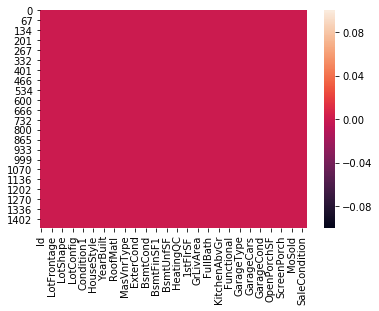

In [72]:
sns.heatmap(df_train.isnull());

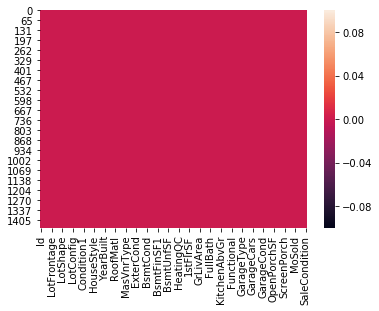

In [71]:
sns.heatmap(df_test.isnull());

In [38]:
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])

In [43]:
#BsmtCond
df_test['BsmtCond'] = df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_train['BsmtCond'] = df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])

In [50]:
#BsmtFinType2
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])

In [70]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [75]:
df_train.shape

(1422, 77)

In [77]:
df_test.shape

(1417, 76)

In [79]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1459
Data columns (total 77 columns):
Id               1422 non-null int64
MSSubClass       1422 non-null int64
MSZoning         1422 non-null object
LotFrontage      1422 non-null float64
LotArea          1422 non-null int64
Street           1422 non-null object
LotShape         1422 non-null object
LandContour      1422 non-null object
Utilities        1422 non-null object
LotConfig        1422 non-null object
LandSlope        1422 non-null object
Neighborhood     1422 non-null object
Condition1       1422 non-null object
Condition2       1422 non-null object
BldgType         1422 non-null object
HouseStyle       1422 non-null object
OverallQual      1422 non-null int64
OverallCond      1422 non-null int64
YearBuilt        1422 non-null int64
YearRemodAdd     1422 non-null int64
RoofStyle        1422 non-null object
RoofMatl         1422 non-null object
Exterior1st      1422 non-null object
Exterior2nd      1422 non

In [81]:
columns = ['MSZoning', 'Street','LotShape', 'LandContour', 'Utilities', 'LotConfig',
           'LandSlope','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
           'RoofStyle','RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual',
           'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1',
           'BsmtFinType2','Heating', 'HeatingQC','CentralAir', 'Electrical','KitchenQual','Functional',
           'FireplaceQu', 'GarageType','GarageFinish','GarageQual', 'GarageCond','PavedDrive','SaleType','SaleCondition']

In [82]:
len(columns)

39

In [85]:
def category_onehot_multicols(multicolumns):
    df_final = final_df
    for i in multicolumns:
        df1 = pd.get_dummies(final_df[i],drop_first=True)
        final_df.drop([i],axis=1,inplace=True)
        if j==0:
            df_final = df1.copy()
        else:
            df_final = pd.concat([df_final,df1],axis=1)
        j=j+1
    df_final = pd.concat([final_df,df_final],axis=1)
    return df_final

In [84]:
main_df = df_train.copy()